In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

See [here for inflation factor](https://www.census.gov/programs-surveys/acs/guidance/comparing-acs-data/2016.html) to compare ACS 2016 to Census 2000 income

In [2]:
fields = []

# Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,12)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9FE0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,64)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9IE0{}'.format(n))
    
# Gross Rent as a Percentage of Household Income in 1999
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GBW0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,43)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GB30{}'.format(n))

    
print fields

['A.AF9FE001', 'A.AF9FE002', 'A.AF9FE003', 'A.AF9FE004', 'A.AF9FE005', 'A.AF9FE006', 'A.AF9FE007', 'A.AF9FE008', 'A.AF9FE009', 'A.AF9FE010', 'A.AF9FE011', 'A.AF9IE001', 'A.AF9IE002', 'A.AF9IE003', 'A.AF9IE004', 'A.AF9IE005', 'A.AF9IE006', 'A.AF9IE007', 'A.AF9IE008', 'A.AF9IE009', 'A.AF9IE010', 'A.AF9IE011', 'A.AF9IE012', 'A.AF9IE013', 'A.AF9IE014', 'A.AF9IE015', 'A.AF9IE016', 'A.AF9IE017', 'A.AF9IE018', 'A.AF9IE019', 'A.AF9IE020', 'A.AF9IE021', 'A.AF9IE022', 'A.AF9IE023', 'A.AF9IE024', 'A.AF9IE025', 'A.AF9IE026', 'A.AF9IE027', 'A.AF9IE028', 'A.AF9IE029', 'A.AF9IE030', 'A.AF9IE031', 'A.AF9IE032', 'A.AF9IE033', 'A.AF9IE034', 'A.AF9IE035', 'A.AF9IE036', 'A.AF9IE037', 'A.AF9IE038', 'A.AF9IE039', 'A.AF9IE040', 'A.AF9IE041', 'A.AF9IE042', 'A.AF9IE043', 'A.AF9IE044', 'A.AF9IE045', 'A.AF9IE046', 'A.AF9IE047', 'A.AF9IE048', 'A.AF9IE049', 'A.AF9IE050', 'A.AF9IE051', 'A.AF9IE052', 'A.AF9IE053', 'A.AF9IE054', 'A.AF9IE055', 'A.AF9IE056', 'A.AF9IE057', 'A.AF9IE058', 'A.AF9IE059', 'A.AF9IE060', 'A.AF

In [3]:
db = "/home/eric/Documents/franklin/cost_burden/generated_data/cost_burden.sqlite"
con = sql.connect(db)
con.text_factory=str


qry = '''
SELECT A.GISJOIN ,
A.COUNTY, A.STATE,
A.AF2LE001 AS pop16,
C.FL5001 AS pop00,
B.AGQ1E003 AS med_renter_inc_16,
A.AF89E001 AS med_gross_rent_16,
D.GED002 * 1.4415372 AS med_renter_inc_00,
D.GBO001 * 1.4415372 AS med_gross_rent_00,
{}
FROM nhgis_20165_county_ds225 AS A JOIN nhgis_20165_county_ds226 AS B
    ON A.GISJOIN = B.GISJOIN 
JOIN nhgis_2000_county_ds146 AS C 
    ON A.GISJOIN = C.GISJOIN
JOIN nhgis_2000_county_ds151 AS D
    ON A.GISJOIN = D.GISJOIN
WHERE A.STATEA NOT IN ('72', '02', '15')
AND B.AGQ1M003 <> '' AND A.AF89E001 <> ''
AND C.FL5001 > 50000
'''.format(', '.join(map(str, fields)))

df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()

print len(df)
df.head()

907


,COUNTY,STATE,pop16,pop00,med_renter_inc_16,med_gross_rent_16,med_renter_inc_00,med_gross_rent_00,AF9FE001,AF9FE002,...,GB3033,GB3034,GB3035,GB3036,GB3037,GB3038,GB3039,GB3040,GB3041,GB3042
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G0100030,Baldwin County,Alabama,199510,140415,33665,889,38171.905056,815.910055,21244,862,...,0,0,0,30,338,0,0,0,0,66
G0100090,Blount County,Alabama,57704,51024,26215,631,28450.178179,554.991822,4365,245,...,0,2,0,41,53,0,0,0,0,3
G0100150,Calhoun County,Alabama,115883,112249,24024,635,25986.591104,595.354864,13964,656,...,0,0,0,7,288,0,0,0,0,22
G0100330,Colbert County,Alabama,54377,54984,24547,638,26057.226427,596.796401,6169,313,...,0,0,0,21,78,0,0,0,0,20
G0100430,Cullman County,Alabama,81316,77483,22581,626,29740.353973,573.731806,7498,202,...,0,0,0,17,67,6,0,0,0,18


In [4]:
# gen cost burden vars
df['renter_cost_burden_16'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(7,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['AF9FE0{}'.format(n)]  
    
df['renter_cost_burden_16'] = num * 1.0 / df['AF9FE001'] * 100


# 2000
df['renter_cost_burden_00'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(6,10)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['GBW0{}'.format(n)]  
    
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    denom += df['GBW0{}'.format(n)]  
    
df['renter_cost_burden_00'] = num * 1.0 / denom * 100

In [5]:
# calc pop change in each decade
df['ppctchg_0016'] = ( df['pop16'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

# growth categories 2000-2010
df['growth_cat'] = 0
df.loc[df['ppctchg_0016'] >= 5, 'growth_cat'] = 'growing'
df.loc[(df['ppctchg_0016'] < 5) & (df['ppctchg_0016'] >= 0 ), 'growth_cat'] = 'stable'
df.loc[df['ppctchg_0016'] < 0, 'growth_cat'] = 'shrinking'

df.groupby('growth_cat').size()

growth_cat
growing      619
shrinking    154
stable       134
dtype: int64

In [6]:
# create index values where 100 = 2000 val
cols = ['med_renter_inc', 'med_gross_rent']
for c in cols:
    df['{}_00_idx'.format(c)] = df['{}_00'.format(c)] / df['{}_00'.format(c)] * 100

for c in cols:
    df['{}_16_idx'.format(c)] = df['{}_16'.format(c)] / df['{}_00'.format(c)] * 100

(0, 38624.036674679999)

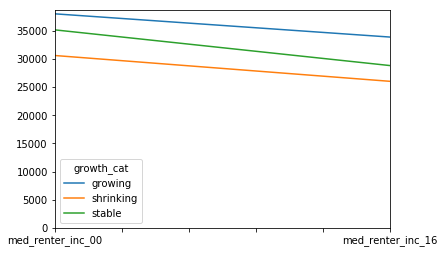

In [7]:
grouped = df.groupby('growth_cat')
cols = ['med_renter_inc_00', 'med_renter_inc_16']
ax=grouped[cols].median().transpose().plot()
ax.set_ylim(0)

(80, 115)

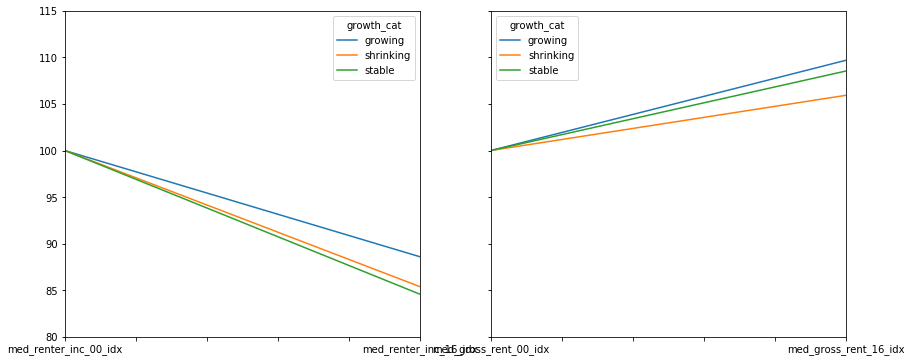

In [8]:
w = 14
h = 6
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

cols = ['med_renter_inc_00_idx', 'med_renter_inc_16_idx']
grouped[cols].median().transpose().plot(ax=ax1)

cols = ['med_gross_rent_00_idx', 'med_gross_rent_16_idx']
ax=grouped[cols].median().transpose().plot(ax=ax2)


ax1.set_ylim(80, 115)

In [9]:
# calc diff for each county
df['renter_inc_diff'] = df['med_renter_inc_16_idx'] - 100
df['gross_rent_diff'] = df['med_gross_rent_16_idx'] - 100

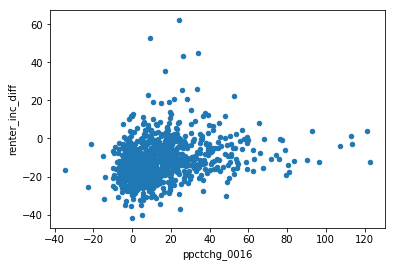

In [10]:
df.plot.scatter('ppctchg_0016', 'renter_inc_diff')

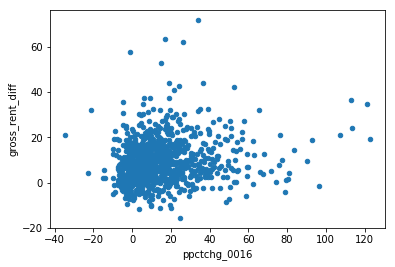

In [11]:
df.plot.scatter('ppctchg_0016', 'gross_rent_diff')

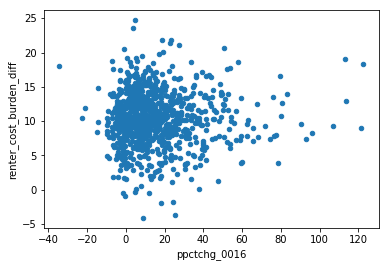

In [12]:
df['renter_cost_burden_diff'] = df['renter_cost_burden_16'] - df['renter_cost_burden_00']
df.plot.scatter('ppctchg_0016', 'renter_cost_burden_diff')

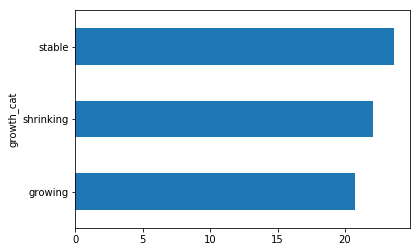

In [13]:
# plot gap between rent increase and income decrease
df['idx_gap'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_16_idx']
df.groupby('growth_cat')['idx_gap'].median().transpose().plot(kind='barh')

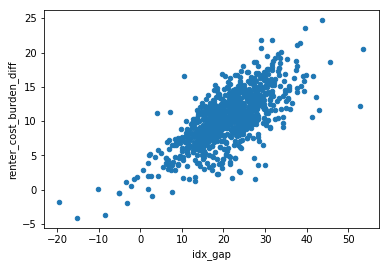

In [14]:
df.plot.scatter('idx_gap', 'renter_cost_burden_diff')

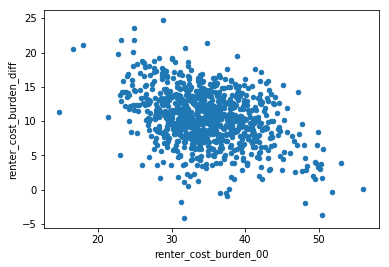

In [15]:
df.plot.scatter('renter_cost_burden_00', 'renter_cost_burden_diff')

In [16]:
import statsmodels.formula.api as smf

In [17]:
mod = smf.ols(formula='renter_cost_burden_diff ~ idx_gap + renter_cost_burden_00 + np.log(pop00)', data=df)
res = mod.fit(cov_type='HC3')
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     renter_cost_burden_diff   R-squared:                       0.580
Model:                                 OLS   Adj. R-squared:                  0.579
Method:                      Least Squares   F-statistic:                     322.3
Date:                     Sun, 02 Sep 2018   Prob (F-statistic):          3.10e-142
Time:                             18:34:06   Log-Likelihood:                -2135.7
No. Observations:                      907   AIC:                             4279.
Df Residuals:                          903   BIC:                             4299.
Df Model:                                3                                         
Covariance Type:                       HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/home/eric/anaconda2/envs/geo/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


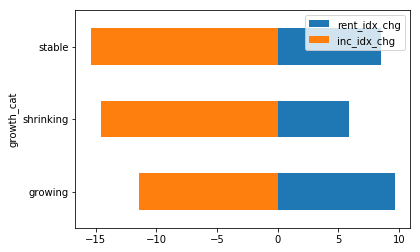

In [18]:
df['rent_idx_chg'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_00_idx']
df['inc_idx_chg'] = df['med_renter_inc_16_idx'] - df['med_renter_inc_00_idx']
cols = ['rent_idx_chg', 'inc_idx_chg']
grouped[cols].median().plot(kind='barh', stacked=True)

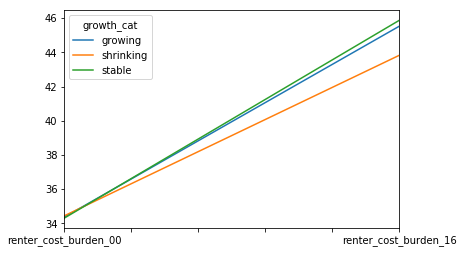

In [19]:
cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
grouped[cols].median().transpose().plot()

/home/eric/anaconda2/envs/geo/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


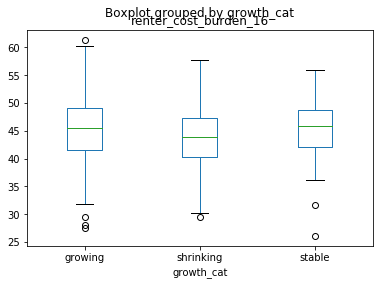

In [20]:
ax=df.boxplot(column='renter_cost_burden_16', by='growth_cat')
ax.grid(False)

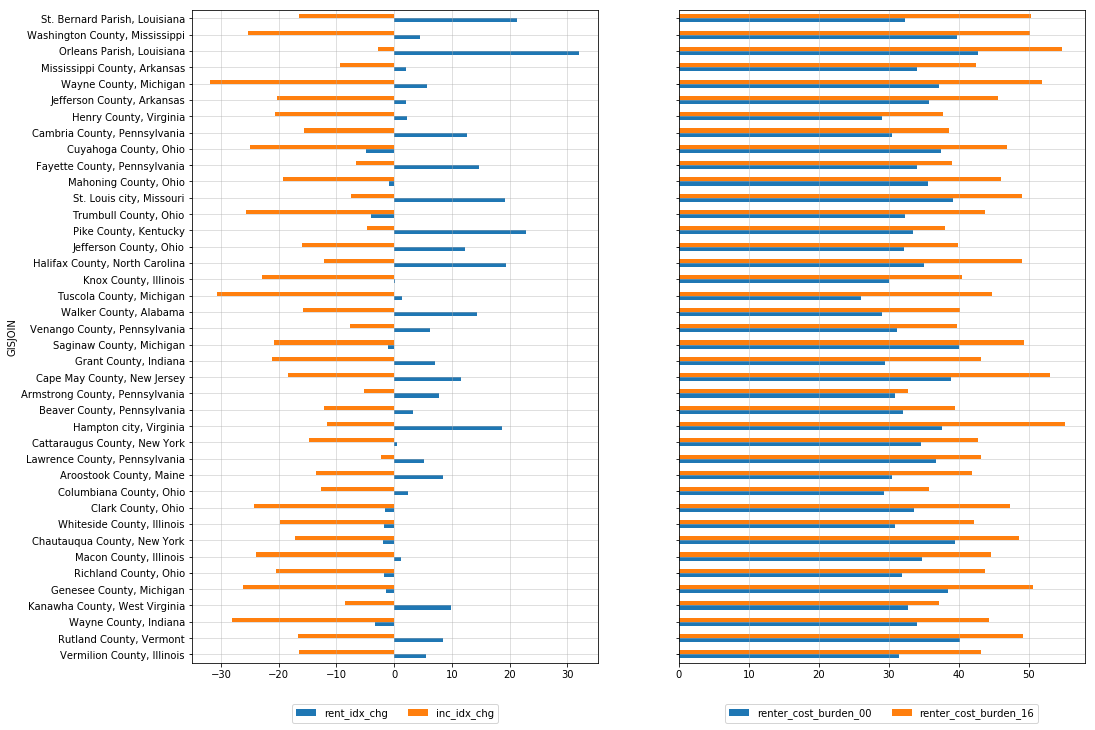

In [21]:
# plot affordability gap for shrinking counties by descending amount of pop loss
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']<-5)].sort_values('ppctchg_0016', ascending=True).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['COUNTY'] + ', ' + subset['STATE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['COUNTY'] + ', ' + subset['STATE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

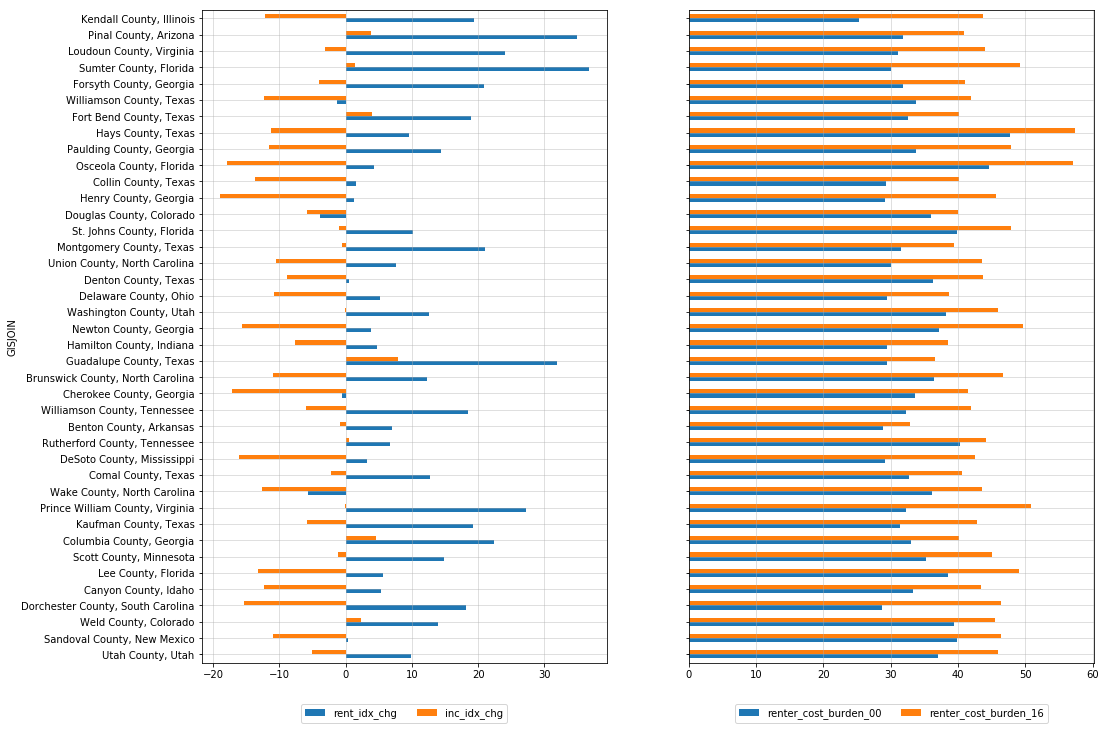

In [22]:
# plot affordability gap for growing counties by descending amount of pct pop growth
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']>5)].sort_values('ppctchg_0016', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['COUNTY'] + ', ' + subset['STATE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['COUNTY'] + ', ' + subset['STATE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)